# Lab 02

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [3]:
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

In [20]:
# Load the training labels
root = Path("archive") # Path to the dataset location
data = pd.read_csv(root / 'Train.csv')
data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


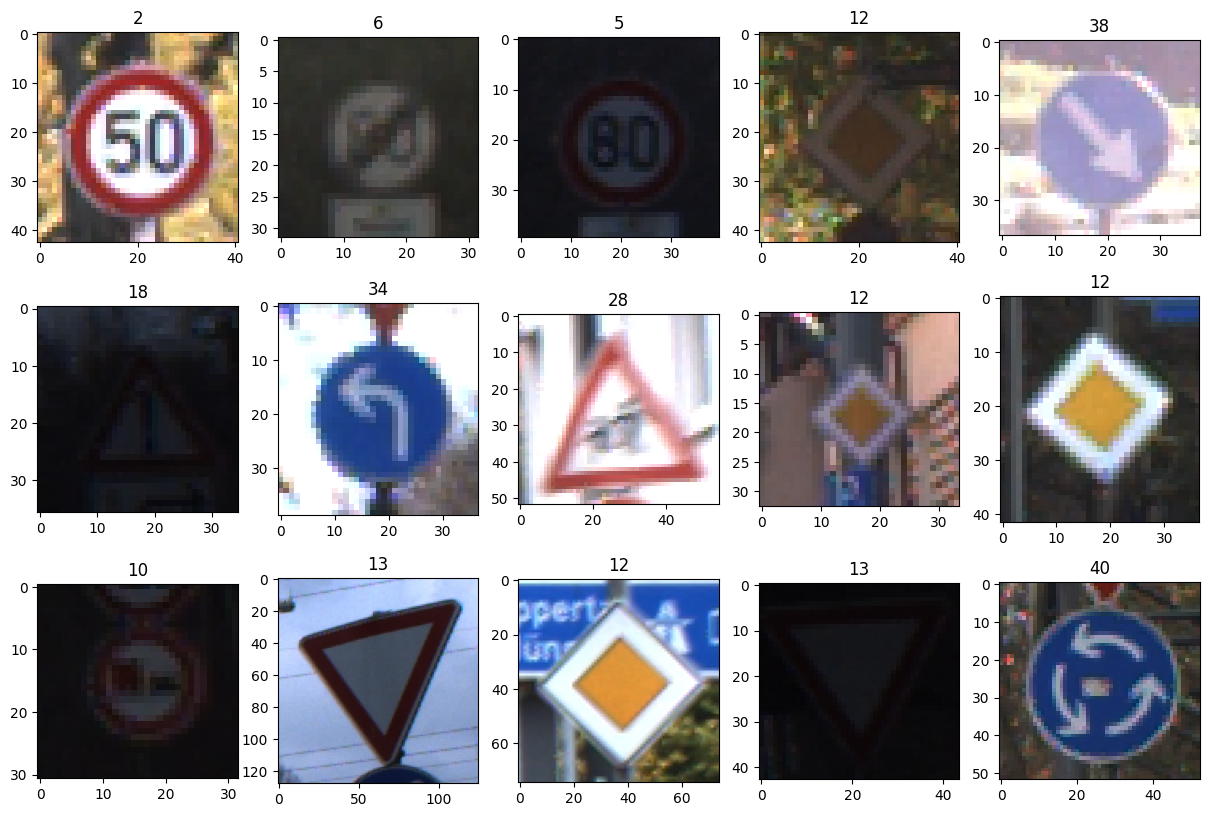

In [13]:
# Number of training samples (amount of samples in data)
num_samples = data.shape[0]

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(str(root / data.iloc[idx]['Path']))
    # Convert image to RGB
    img = img[:, :, ::-1]
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [15]:
# Extract class identifiers
# Hint: Check the csv 
ids = data["ClassId"].tolist()

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

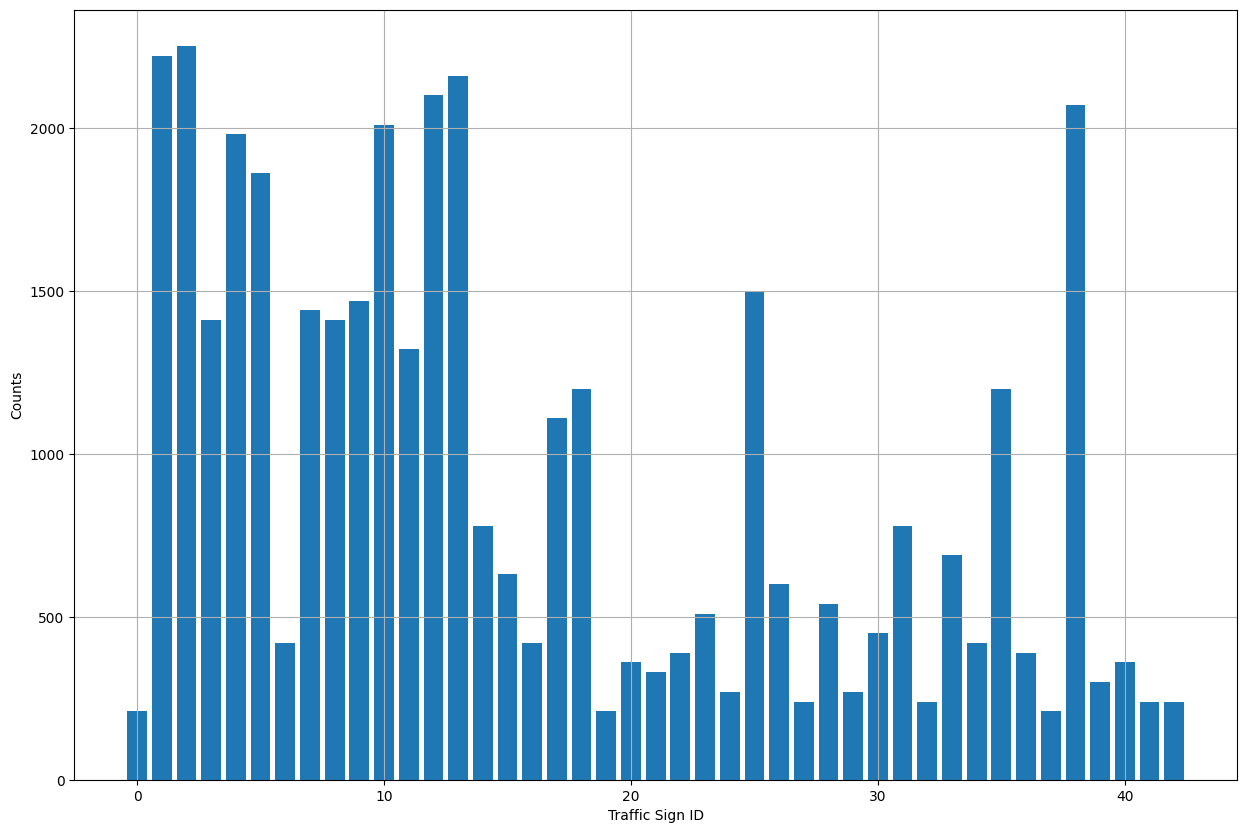

In [16]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

I consider this dataset is unbalanced because you can easily find at least 10 the biggest classes on the histogram, that greater than the least in almost 10 times.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [41]:
from typing import List
from collections import defaultdict
from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor, as_completed

CORES = cpu_count()

In [44]:
data['Resolution'] = data['Width'].astype(str) + 'x' + data['Height'].astype(str)
data["NewPath"] = str(root) + "/" + data["Path"]
data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Resolution,NewPath
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,27x26,archive/Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,28x27,archive/Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,29x26,archive/Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,28x27,archive/Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,28x26,archive/Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png,52x56,archive/Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png,56x58,archive/Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png,58x62,archive/Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png,63x69,archive/Train/42/00042_00007_00028.png


In [28]:
resolution = Counter(data['Resolution'].tolist())

In [29]:
resolution.most_common(10)

[('31x31', 396),
 ('30x30', 380),
 ('35x35', 360),
 ('32x32', 352),
 ('33x33', 351),
 ('38x38', 345),
 ('34x34', 339),
 ('29x29', 338),
 ('30x31', 337),
 ('36x36', 334)]

In [49]:
def calculate_brightness(image_path: str) -> np.ndarray:
    image = cv2.imread(image_path)
    if image is None:
        return None
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(image_gray)


def worker(image_paths: List[str]) -> dict:
    class_brightness = defaultdict(list)
    
    with ProcessPoolExecutor(CORES) as executor:
        brightness_values = list(executor.map(calculate_brightness, image_paths))
    
    # associate the brightness values with the ClassId
    for brightness, (_, row) in zip(brightness_values, data.iterrows()):
        if brightness is not None:
            class_brightness[row['ClassId']].append(brightness)
    return class_brightness

In [50]:
class_brightness = worker(data['NewPath'].tolist())

In [53]:
brightness = []
for i in class_brightness.values():
    brightness.extend(i)

In [55]:
brightness[:10]

[58.43019943019943,
 58.91005291005291,
 58.80636604774536,
 58.16137566137566,
 56.630494505494504,
 56.40860215053763,
 55.43087557603687,
 54.46658986175115,
 53.69966629588431,
 53.21231617647059]

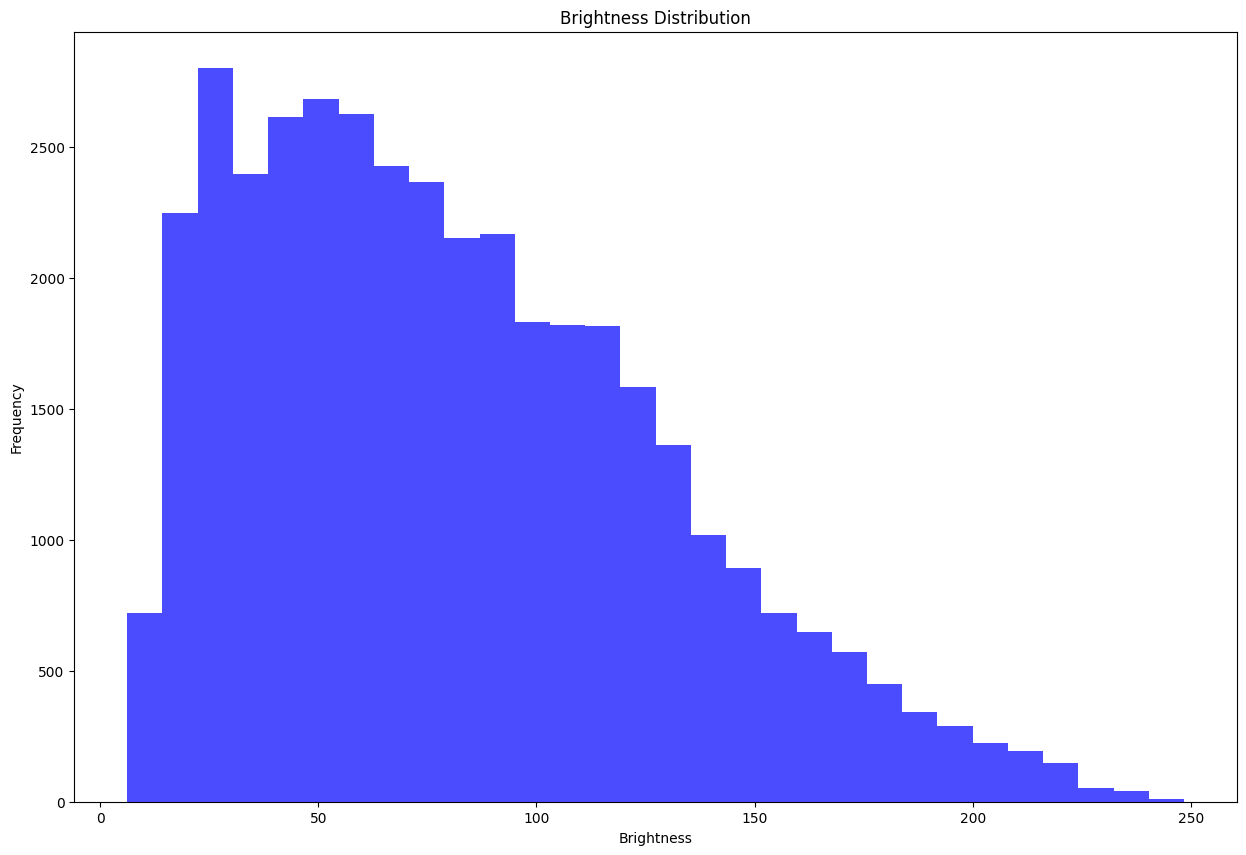

In [54]:
# Brightness distribution
plt.hist(brightness, bins=30, color='blue', alpha=0.7, label='Overall Brightness')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.title('Brightness Distribution')
plt.show()

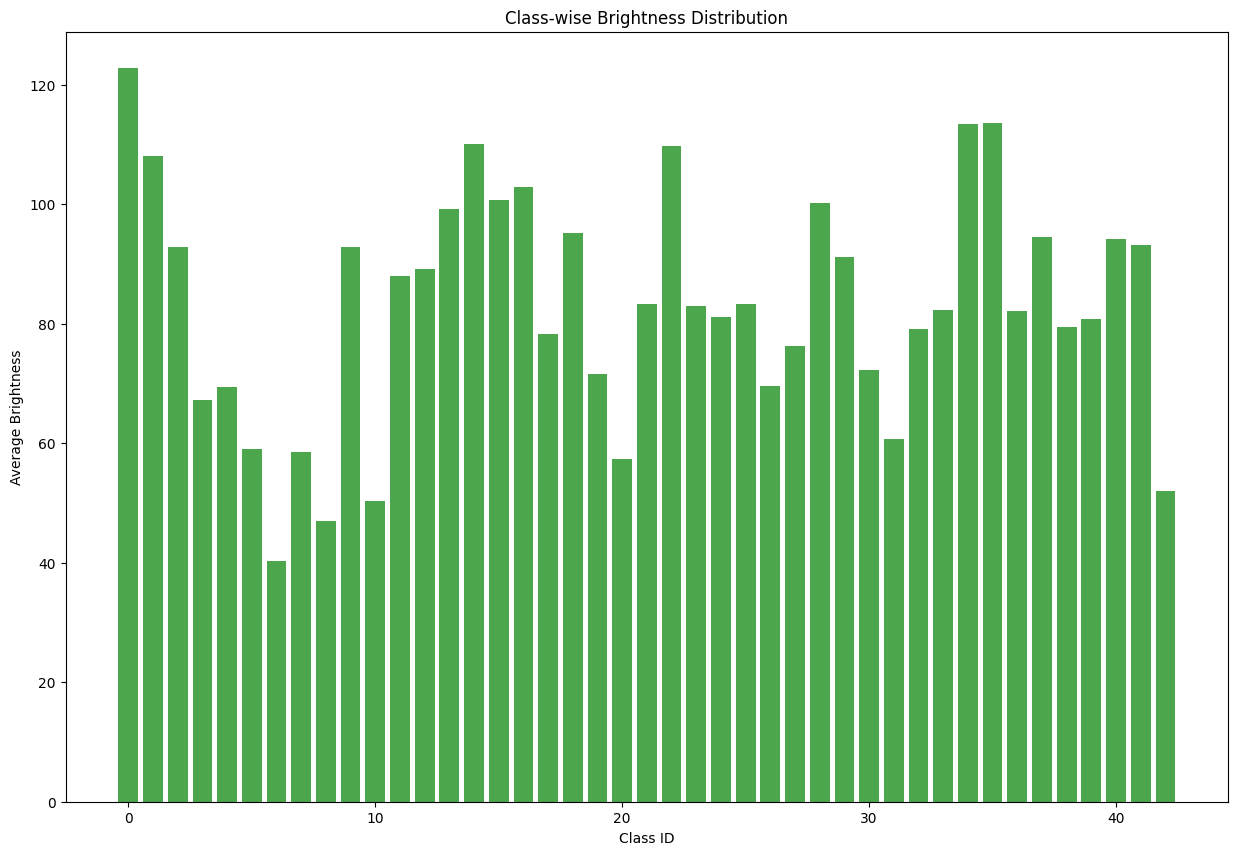

In [56]:
# Class-wise brightness
class_ids = []
class_brightness_means = []
for class_id, brightness_values in class_brightness.items():
    class_ids.append(class_id)
    class_brightness_means.append(np.mean(brightness_values))

plt.bar(class_ids, class_brightness_means, color='green', alpha=0.7, label='Class-wise Brightness')
plt.xlabel('Class ID')
plt.ylabel('Average Brightness')
plt.title('Class-wise Brightness Distribution')
plt.show()